# Metrics and Plots for the trained models

In [6]:
import os
os.chdir(os.path.dirname(os.getcwd())) if os.getcwd().endswith('notebooks') else None

dump_dir='dump/'

import pandas as pd
from evaluator import Evaluator
from collector import ResultsCollector
from visualizer import DashboardVisualizer
from joblib import load

In [7]:
ALL_MODELS={}
for joblib_file in os.listdir(dump_dir):
    if joblib_file.endswith('_MLmodel.joblib'):
        model_path=os.path.join(dump_dir, joblib_file)
        print(f'-- loading model from {model_path}')
        model_loaded=load(model_path)
        ALL_MODELS[joblib_file.replace('_MLmodel.joblib','')]=model_loaded

-- loading model from dump/mlp_Complex_protein_embeddings_MLmodel.joblib
-- loading model from dump/mlp_Complex_sample_embeddings_MLmodel.joblib
-- loading model from dump/mlp_concatenated_protein_embeddings_MLmodel.joblib
-- loading model from dump/mlp_concatenated_sample_embeddings_MLmodel.joblib
-- loading model from dump/mlp_gene_expression_MLmodel.joblib
-- loading model from dump/mlp_RGCN_protein_embeddings_MLmodel.joblib
-- loading model from dump/mlp_RGCN_sample_embeddings_MLmodel.joblib
-- loading model from dump/svm_Complex_protein_embeddings_MLmodel.joblib
-- loading model from dump/svm_Complex_sample_embeddings_MLmodel.joblib
-- loading model from dump/svm_concatenated_sample_embeddings_MLmodel.joblib
-- loading model from dump/svm_gene_expression_MLmodel.joblib
-- loading model from dump/svm_RGCN_sample_embeddings_MLmodel.joblib
-- loading model from dump/xgboost_Complex_protein_embeddings_MLmodel.joblib
-- loading model from dump/xgboost_Complex_sample_embeddings_MLmodel.

In [8]:
collector = ResultsCollector()
metrics_list = []

for model_name, ml_model in ALL_MODELS.items():
    print(f'-- Evaluating model: {model_name}')
    y_test, y_pred, y_proba = ml_model.y_test, ml_model.y_pred, ml_model.y_proba
    metrics = Evaluator(y_test, y_pred, y_proba).compute_metrics()
    metrics_list.append({
            "model": ml_model.model_type,
            "input": '_'.join(ml_model.dataset_name.split('_')[1:]),
            **metrics
    })

    collector.add(ml_model.model_type, '_'.join(ml_model.dataset_name.split('_')[1:]), y_test, y_pred, y_proba)
results_df = pd.DataFrame(metrics_list)


-- Evaluating model: mlp_Complex_protein_embeddings
-- Evaluating model: mlp_Complex_sample_embeddings
-- Evaluating model: mlp_concatenated_protein_embeddings
-- Evaluating model: mlp_concatenated_sample_embeddings
-- Evaluating model: mlp_gene_expression
-- Evaluating model: mlp_RGCN_protein_embeddings
-- Evaluating model: mlp_RGCN_sample_embeddings
-- Evaluating model: svm_Complex_protein_embeddings
-- Evaluating model: svm_Complex_sample_embeddings
-- Evaluating model: svm_concatenated_sample_embeddings
-- Evaluating model: svm_gene_expression
-- Evaluating model: svm_RGCN_sample_embeddings
-- Evaluating model: xgboost_Complex_protein_embeddings
-- Evaluating model: xgboost_Complex_sample_embeddings
-- Evaluating model: xgboost_concatenated_protein_embeddings
-- Evaluating model: xgboost_concatenated_sample_embeddings
-- Evaluating model: xgboost_gene_expression
-- Evaluating model: xgboost_RGCN_protein_embeddings
-- Evaluating model: xgboost_RGCN_sample_embeddings


/home/raysas/miniconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [9]:
results_df

,model,input,balanced_accuracy,precision,recall,f1,mcc,auroc,auprc,brier
0,mlp,Complex_protein_embeddings,0.888889,0.923077,1.0,0.960000,0.847319,1.000000,1.000000,0.033064
1,mlp,Complex_sample_embeddings,0.666667,0.800000,1.0,0.888889,0.516398,0.870370,0.948028,0.161098
2,mlp,concatenated_protein_embeddings,0.500000,0.727273,1.0,0.842105,0.000000,0.500000,0.727273,0.272727
3,mlp,concatenated_sample_embeddings,0.500000,0.727273,1.0,0.842105,0.000000,0.500000,0.727273,0.247038
4,mlp,gene_expression,0.500000,0.000000,0.0,0.000000,0.000000,0.500000,0.727273,0.260310
5,mlp,RGCN_protein_embeddings,0.500000,0.727273,1.0,0.842105,0.000000,0.500000,0.727273,0.272727
6,mlp,RGCN_sample_embeddings,0.500000,0.727273,1.0,0.842105,0.000000,0.500000,0.727273,0.248354
7,svm,Complex_protein_embeddings,0.833333,0.888889,1.0,0.941176,0.769800,1.000000,1.000000,0.032236
8,svm,Complex_sample_embeddings,0.500000,0.727273,1.0,0.842105,0.000000,0.782407,0.902813,0.151732
9,svm,concatenated_sample_embeddings,0.500000,0.727273,1.0,0.842105,0.000000,0.518519,0.732810,0.203251


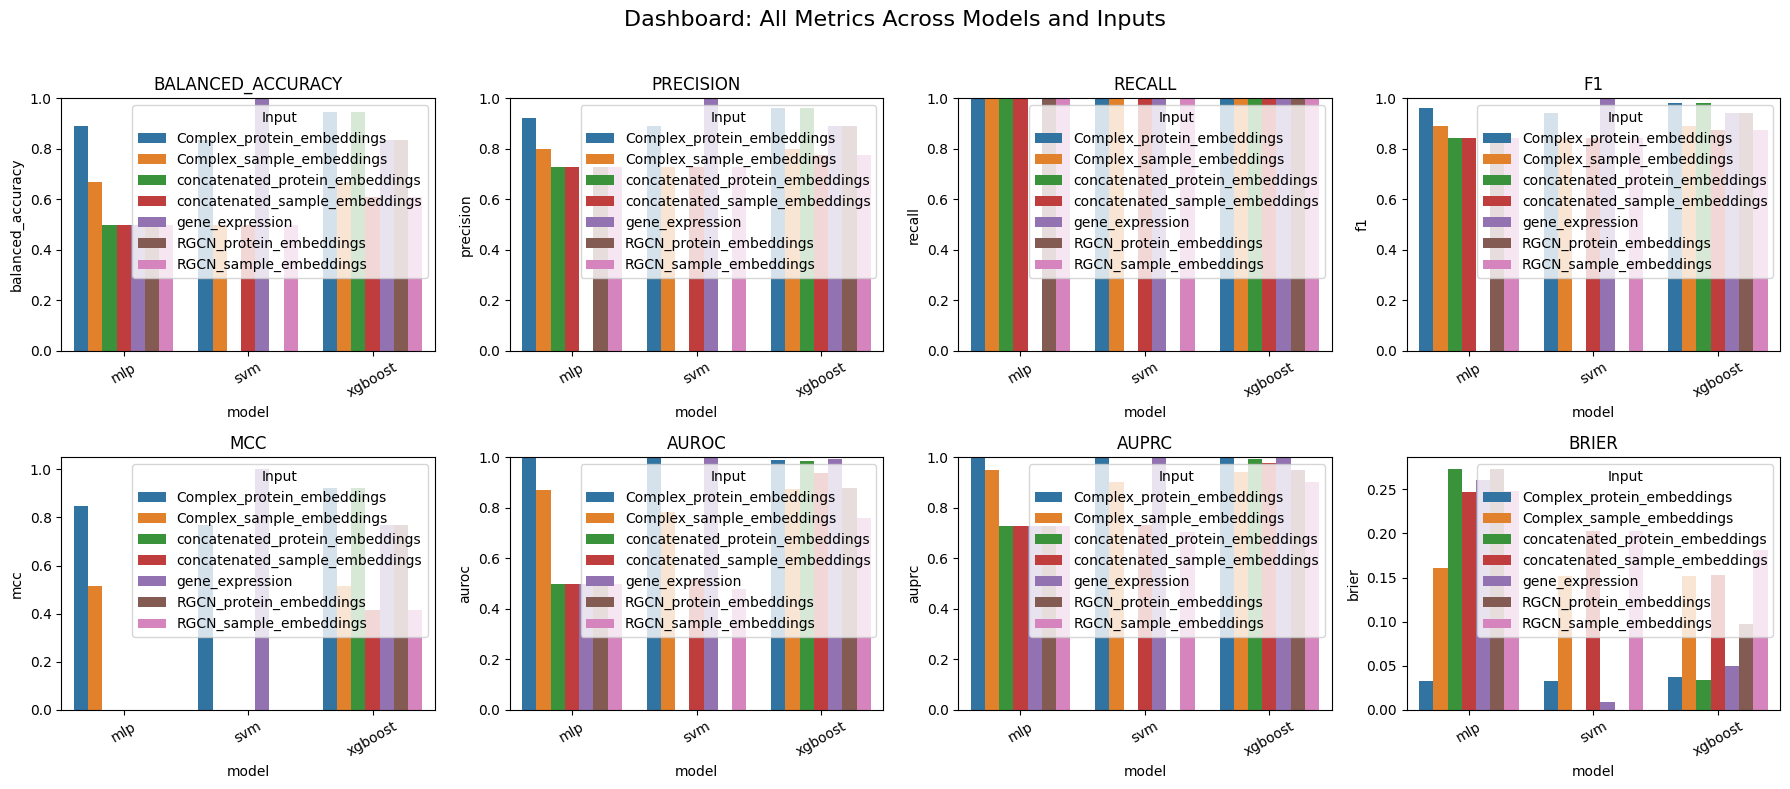

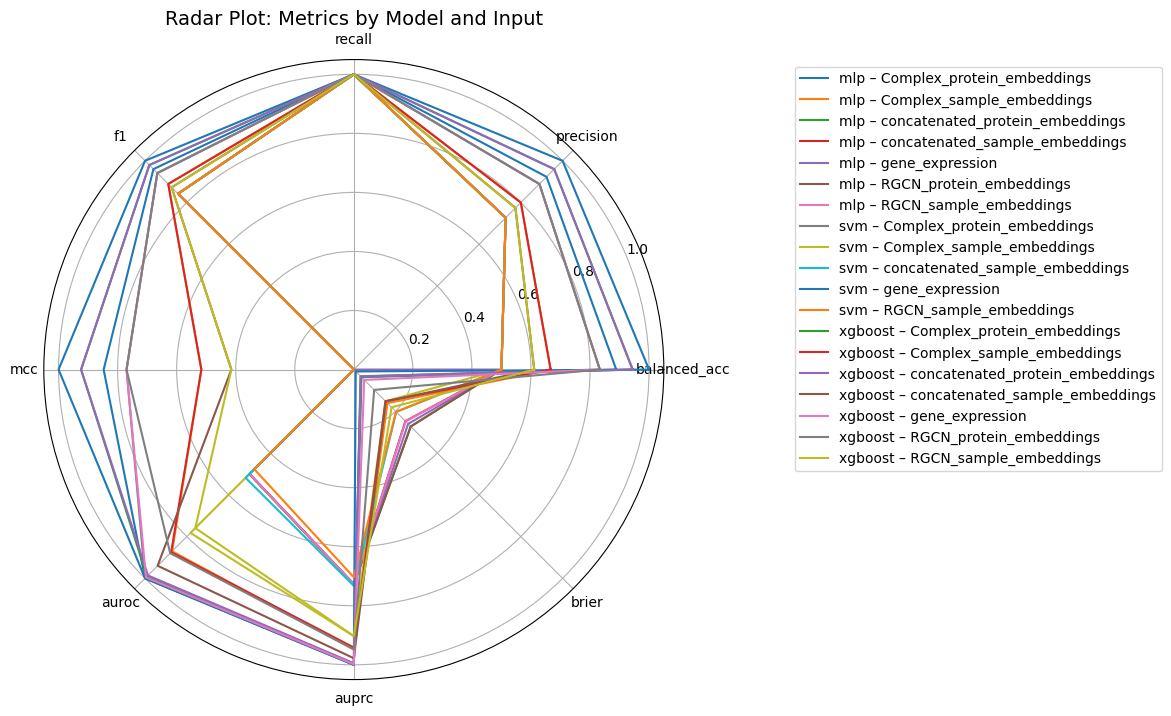

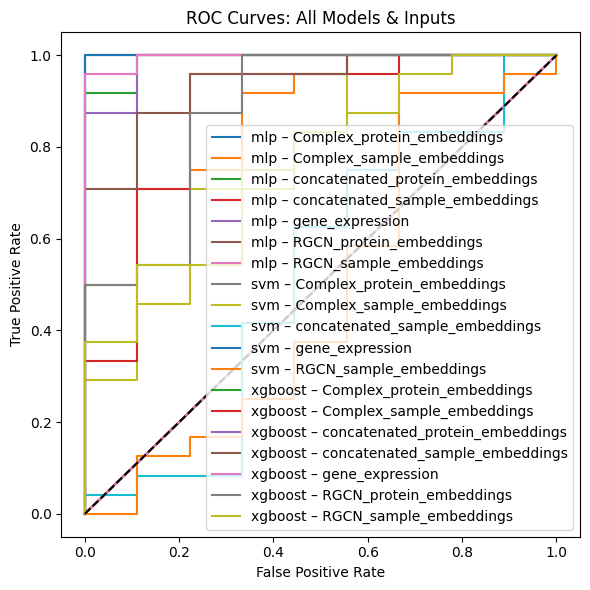

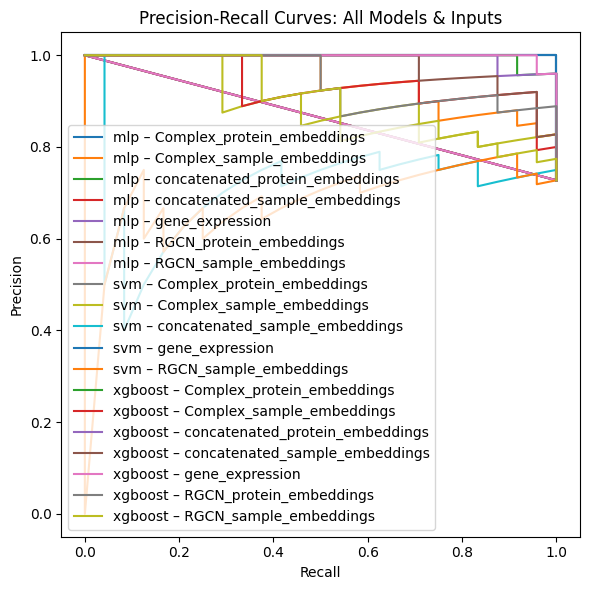

In [10]:
dashboard = DashboardVisualizer(results_df, collector)
dashboard.plot_metric_grid()
dashboard.plot_radar()
dashboard.plot_roc_curves()
dashboard.plot_pr_curves()
